In [2]:
!git clone https://github.com/imostafizur/CSE498R.git

fatal: destination path 'CSE498R' already exists and is not an empty directory.


# Malaria Detection using Deep Learning VGG19 model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [4]:
image = 'cell_images'

In [5]:
print('Number of images in each folder:')
for folder in os.listdir(image):
    print(folder, len(os.listdir(os.path.join(image, folder))))

Number of images in each folder:
Uninfected 13780
Parasitized 13780


In [6]:
df = pd.DataFrame(columns=['image', 'label'])
for folder in os.listdir(image):
    for file in os.listdir(os.path.join(image, folder)):
        df = df.append({'image': file, 'label': folder}, ignore_index=True)
df.head()

,image,label
0,C144P105ThinF_IMG_20151015_160529_cell_143.png,Uninfected
1,C102P63ThinF_IMG_20150918_162300_cell_63.png,Uninfected
2,C39P4thinF_original_IMG_20150622_110352_cell_1...,Uninfected
3,C170P131ThinF_IMG_20151119_120233_cell_174.png,Uninfected
4,C204ThinF_IMG_20151029_112231_cell_169.png,Uninfected


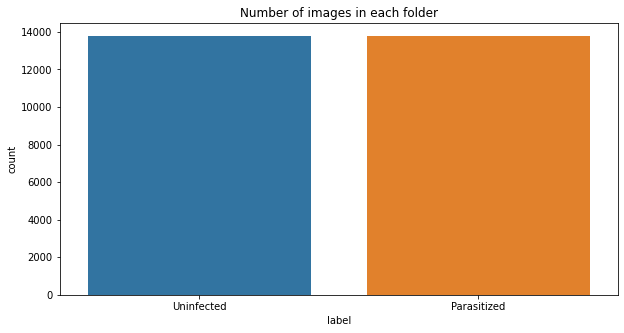

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.title('Number of images in each folder')
plt.show()


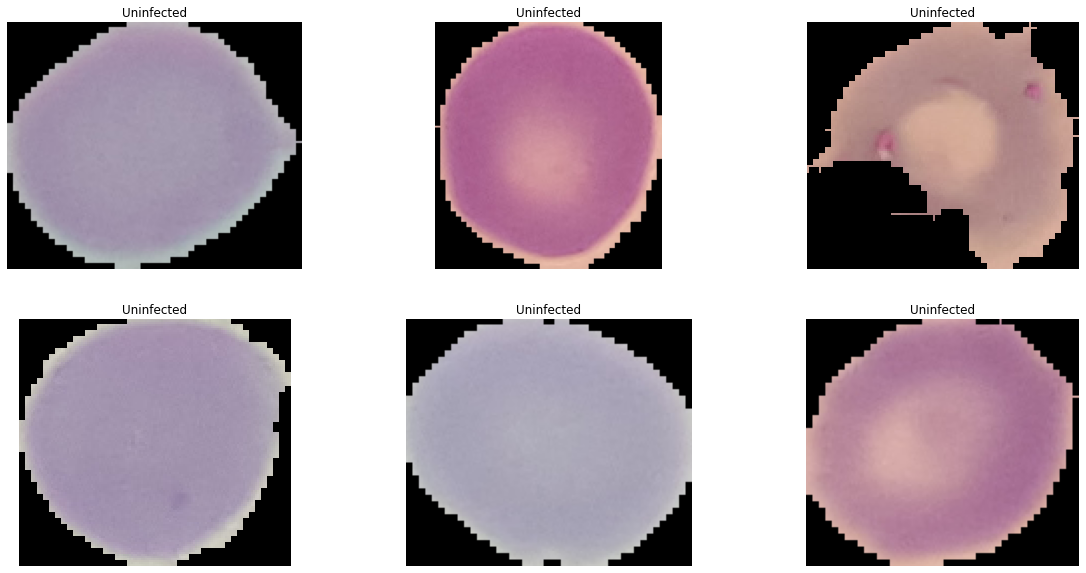

In [8]:
# Parasiitized images
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = plt.imread(os.path.join(image, df.iloc[i, 1], df.iloc[i, 0]))
    plt.imshow(img)
    plt.title(df.iloc[i, 1])
    plt.axis('off')

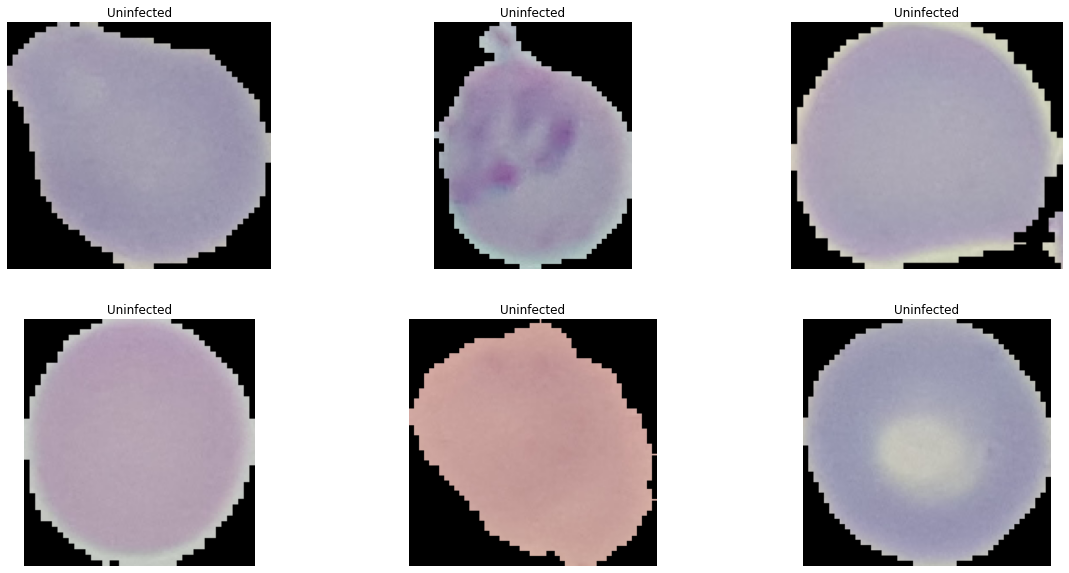

In [9]:
# Uninfected images of malaria
plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    img = plt.imread(os.path.join(image, df.iloc[i+6, 1], df.iloc[i+6, 0]))
    plt.imshow(img)
    plt.title(df.iloc[i+6, 1])
    plt.axis('off')

In [10]:
# Data preprocessing from cell_images folder
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')
                                        

In [11]:
# VGG19 model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [12]:
# Training the model using cell_images folder
train_generator = train_datagen.flow_from_directory(image,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')
                                                    

Found 27558 images belonging to 2 classes.


In [13]:
# Training the model
history = model.fit_generator(train_generator,
                                epochs=10,
                                steps_per_epoch=200,
                                validation_steps=50)
                                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
200/200 [==============================] - 108s 440ms/step - loss: 1.3179 - accuracy: 0.5094
Epoch 2/10
200/200 [==============================] - 89s 445ms/step - loss: 0.6934 - accuracy: 0.4994
Epoch 3/10
200/200 [==============================] - 89s 445ms/step - loss: 0.6936 - accuracy: 0.4958
Epoch 4/10
200/200 [==============================] - 91s 455ms/step - loss: 0.6932 - accuracy: 0.5027
Epoch 5/10
200/200 [==============================] - 88s 439ms/step - loss: 0.6933 - accuracy: 0.4916
Epoch 6/10
200/200 [==============================] - 90s 449ms/step - loss: 0.6931 - accuracy: 0.4992
Epoch 7/10
200/200 [==============================] - 90s 451ms/step - loss: 0.6933 - accuracy: 0.5009
Epoch 8/10
200/200 [==============================] - 90s 447ms/step - loss: 0.6931 - accuracy: 0.5063
Epoch 9/10
200/200 [==============================] - 89s 446ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 10/10
200/200 [==============================] - 89s 444ms/step - 

In [14]:
# Resize the images
from PIL import Image
import glob
import os

def resize_images():
    for filename in glob.glob('cell_images/Parasitized/*.png'):
        im = Image.open(filename)
        imResize = im.resize((224, 224), Image.ANTIALIAS)
        imResize.save(filename, 'PNG', quality=90)

    for filename in glob.glob('cell_images/Uninfected/*.png'):
        im = Image.open(filename)
        imResize = im.resize((224, 224), Image.ANTIALIAS)
        imResize.save(filename, 'PNG', quality=90)


In [15]:
# Testing the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('cell_images',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='binary')
                                                    

Found 27558 images belonging to 2 classes.


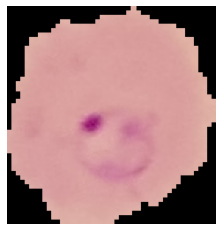

In [16]:
# Predict the image
img = plt.imread('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
plt.imshow(img)
plt.axis('off')
plt.show()


In [17]:
img = tf.keras.preprocessing.image.load_img('cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png', target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0
print(img.shape)

# Predict the image
pred = model.predict(img)
print(pred)

(1, 224, 224, 3)
[[0.5032925]]


In [18]:
# predict the image if else 
if pred > 0.5:
    print('Parasitized')
else:
    print('Uninfected')

Parasitized


In [19]:
# Save the model
model.save('malaria.h5')